In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Part 1 ##
### Inverstion Method: Distribution Function ###

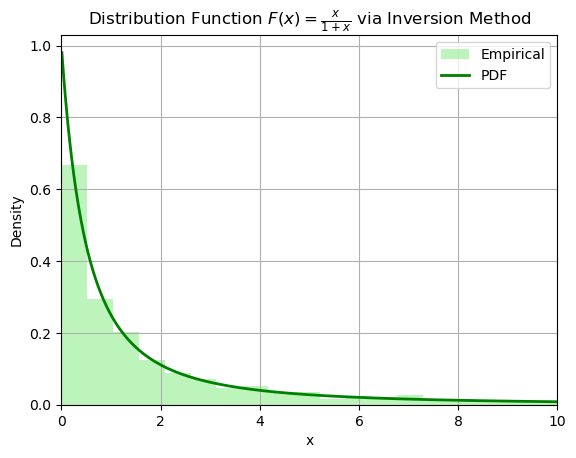

In [2]:
n = 1000

# Step 1: generating unif(0,1) random variables
U = np.random.rand(n)

# Step 2: applying inverse CDF transform
x = U / (1 - U)

# pdf
x_vals = np.linspace(0.01, 10, 1000)
pdf = 1 / (1 + x_vals)**2 

#plotting
plt.hist(x, bins=2000, color='lightgreen', density=True, alpha=0.6, label="Empirical")
plt.plot(x_vals, pdf, 'g-', lw=2, label="PDF")
plt.title(r"Distribution Function $F(x)=\frac{x}{1+x}$ via Inversion Method")
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.grid(True)
plt.legend()
plt.savefig("prob1.png")
plt.show()

## Prob 1: Part 2 ##
### Inversion Method: Skew Logistic Distribution ###

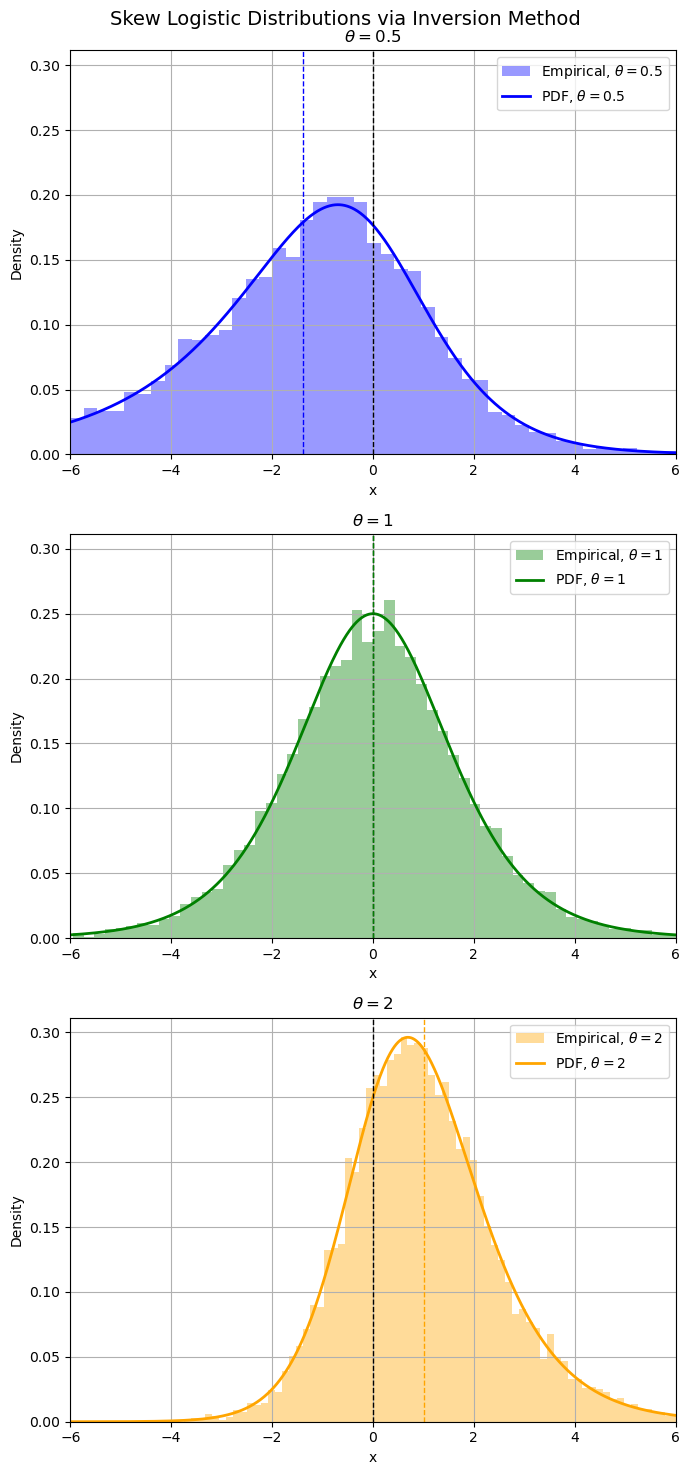

In [3]:
thetas = [0.5, 1, 2]
colors = ["blue", "green", "orange"]
n = 10000

#setting up the graph
fig, ax = plt.subplots(3, 1, figsize=(7, 15), sharey=True)

for i in range(3):
    theta = thetas[i]
    color = colors[i]

    # Step 1: generating Unif(0,1)
    U = np.random.rand(n)

    #Step 2: applying inverse CDF transform
    X = -np.log(U**(-1/theta) - 1)

    #step 4: PDF
    x_vals = np.linspace(-6, 6, 1000)
    pdf = theta * np.exp(-x_vals) / (1 + np.exp(-x_vals))**(theta+1)

    #plotting histogram and PDF
    ax[i].hist(X, bins=100, density=True, alpha=0.4, color=color, label= fr"Empirical, $\theta={theta}$")
    ax[i].plot(x_vals, pdf, color=color, lw=2, label=fr"PDF, $\theta={theta}$")
    ax[i].axvline(0, color="k", ls="--", lw=1)
    ax[i].axvline(np.mean(X), color=color, ls="--", lw=1)
    ax[i].set_title(fr"$\theta = {theta}$")
    ax[i].set_xlabel('x')
    ax[i].set_ylabel("Density")
    ax[i].set_xlim(-6, 6)
    ax[i].legend()
    ax[i].grid(True)

fig.suptitle("Skew Logistic Distributions via Inversion Method", fontsize=14)
plt.tight_layout()
plt.savefig("prob1_part2_subplot.png")
plt.show()

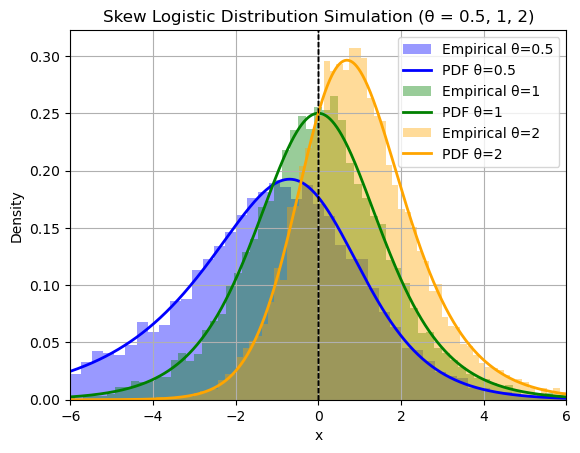

In [4]:
thetas = [0.5, 1, 2]
colors = ["blue", "green", "orange"]
n = 10000
x_vals = np.linspace(-6, 6, 1000)

for i in range(3):
    theta = thetas[i]
    color = colors[i]
    
    # Step 1: generating Unif(0,1)
    U = np.random.uniform(0, 1, n)

    # Step 2: applying inverse CDF transform
    X = -np.log(U**(-1/theta) - 1)

    # Step 3: PDF
    pdf = theta * np.exp(-x_vals) / (1 + np.exp(-x_vals))**(theta+1)

    # plotting histogram + PDF
    plt.hist(X, bins=100, density=True, alpha=0.4, color=color, label=f"Empirical θ={theta}")
    plt.plot(x_vals, pdf, color=color, lw=2, label=f"PDF θ={theta}")
    plt.axvline(0, color="k", linestyle="--", linewidth=1)
    #plt.axvline(np.mean(X), color=color, ls="--", lw=1)

plt.xlim(-6, 6)
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.title("Skew Logistic Distribution Simulation (θ = 0.5, 1, 2)")
#plt.savefig("prob1_part2_oneplot.png")
plt.show()

## Problem 2 ##
## Box - Muller Algorithm ##

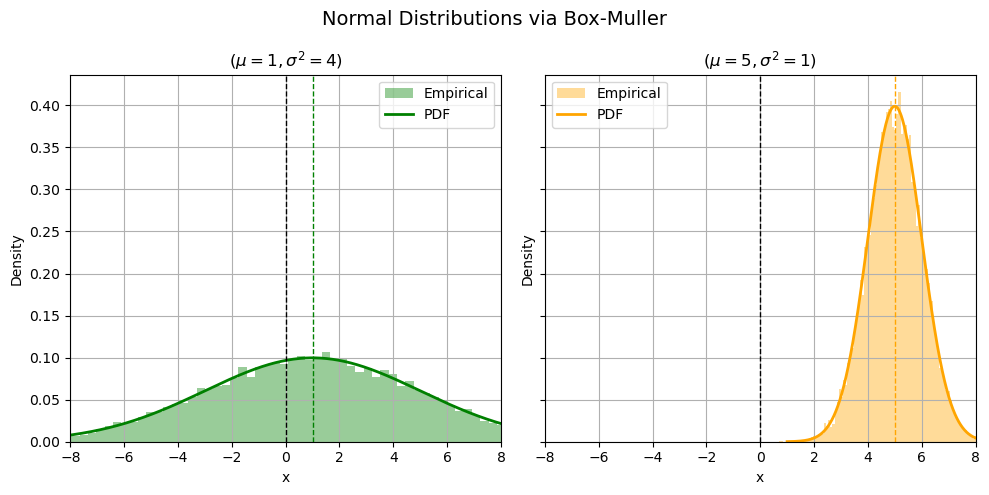

In [5]:
mus = [1,5]
sigmas = [4,1]
colors = ["green", "orange"]
n = 10000

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for i in range(2):
    mu = mus[i]
    sigma = sigmas[i]
    color = colors[i]

    # Step 1: generating uniform random variables
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    
    # Step 2: applying Box-Muller to get normal variables
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    # Step 3: scaling and shift for mean and variance
    x1 = mu + sigma * z1
    x2 = mu + sigma * z2
    x = np.concatenate((x1, x2))
    
    # plotting the PDF
    x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x_vals - mu)**2 / (2 * sigma**2))

    # plotting histogram
    ax[i].hist(x, bins=100, density=True, alpha=0.4, color=color, label= fr"Empirical")
    ax[i].plot(x_vals, pdf, color=color, lw=2, label=fr"PDF")
    ax[i].axvline(0, color="k", ls="--", lw=1)
    ax[i].axvline(mu, color=color, ls="--", lw=1)
    ax[i].set_title(fr"$(\mu={mu}, \sigma^2={sigma})$")
    ax[i].set_xlim(-8, 8)
    ax[i].set_ylabel("Density")
    ax[i].set_xlabel('x')
    ax[i].grid(True)
    ax[i].legend()

fig.suptitle("Normal Distributions via Box-Muller", fontsize=14)
plt.tight_layout()
plt.savefig("prob2.png")
plt.show()

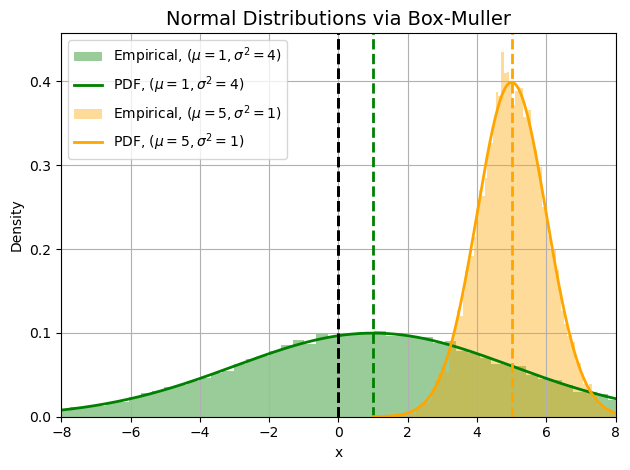

In [6]:
mus = [1,5]
sigmas = [4,1]
colors = ["green", "orange"]
n = 10000

for i in range(2):
    mu = mus[i]
    sigma = sigmas[i]
    color = colors[i]

    # Step 1: generating uniform random variables
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    
    # Step 2: applying Box-Muller to get normal variables
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    # Step 3: scaling and shift for mean and variance
    x1 = mu + sigma * z1
    x2 = mu + sigma * z2
    x = np.concatenate((x1, x2))
    
    # plotting the PDF
    x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x_vals - mu)**2 / (2 * sigma**2))

    # plotting histogram
    plt.hist(x, bins=100, density=True, alpha=0.4, color=color, label= fr"Empirical, $(\mu={mu}, \sigma^2={sigma})$")
    plt.plot(x_vals, pdf, color=color, lw=2, label=fr"PDF, $(\mu={mu}, \sigma^2={sigma})$")
    plt.xlim(-8, 8)
    plt.ylabel("Density")
    plt.xlabel("x")
    plt.grid(True)
    plt.axvline(0, color="k", ls="--", lw=2)
    plt.axvline(mu, color=color, ls="--", lw=2)
    plt.legend()

plt.title("Normal Distributions via Box-Muller", fontsize=14)
plt.tight_layout()
#plt.savefig("prob2.png")
plt.show()

## Problem 3 ##
## Accept-Reject Algorithm ##

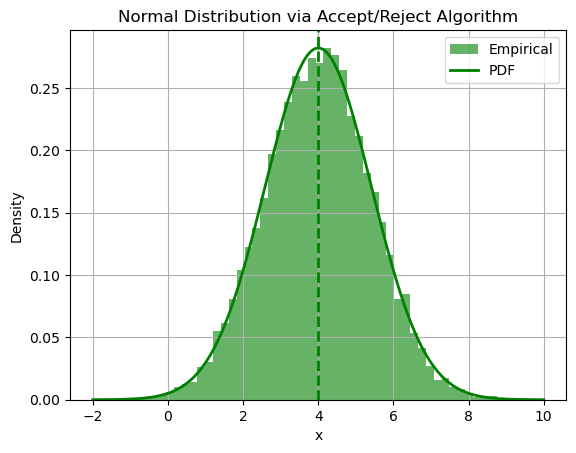

In [7]:
mu = 4
sigma = np.sqrt(2)
b = 1
M = np.e / np.sqrt(np.pi)

# definition function that will contain all of the A/R methodology
def AR(n_samples):
    samples = []
    while len(samples) < n_samples:
        # sample (mu=4, b=1) using inverse CDF
        u = np.random.uniform(-0.5, 0.5)
        x = mu - b * np.sign(u) * np.log(1 - 2*abs(u))

        # compute densities directly
        f_x = (1 / np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2 / (2*sigma**2))
        g_x = (1 / (2*b)) * np.exp(-abs(x - mu) / b)

        # accept-reject step
        if np.random.rand() <= f_x / (M * g_x):
            samples.append(x)
    return np.array(samples)

# generating samples
samples = AR(10000)

# values for the PDF
x_vals = np.linspace(mu - 6, mu + 6, 500)
f_vals = (1 / np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x_vals - mu)**2 / (2*sigma**2))

#plotting and formatting the histogram
plt.hist(samples, bins=50, density=True, alpha=0.6, color = 'green', label="Empirical")
plt.plot(x_vals, f_vals, 'g-', lw=2, label="PDF")
plt.axvline(mu, color="g", ls="--", lw=2)
plt.title("Normal Distribution via Accept/Reject Algorithm")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.savefig("prob3.png")
plt.show()

## Problem 4 ##
## Discrete Random Variable with PMF ##

In [8]:
n_samples = 100000
samples = np.zeros(n_samples)

# inverse transform method
for i in range(n_samples):
    U = np.random.rand()  # uniform(0,1)
    if U < 0.3:
        samples[i] = 0
    elif U < 0.5:  # 0.3 + 0.2
        samples[i] = 1
    elif U < 0.65:  # 0.5 + 0.15
        samples[i] = 2
    else:
        samples[i] = 4

# checking relative frequencies
values = [0, 1, 2, 4]  # possible X values
n_samples = len(samples)

# calculating the relative frequencies
for x in values:
    freq = np.sum(samples == x) / n_samples  # count how many times x appears
    print("X =", x, ", Relative Frequency =", freq)

X = 0 , Relative Frequency = 0.30019
X = 1 , Relative Frequency = 0.20089
X = 2 , Relative Frequency = 0.15158
X = 4 , Relative Frequency = 0.34734
